In [ ]:
!pip install matplotlib

In [ ]:
import numpy as numpy
import matplotlib.pyplot as plt

from datasets import load_dataset

In [3]:
from datasets import load_dataset

ds = load_dataset("ylecun/mnist", split="train")
ds = ds.train_test_split(test_size=0.2, shuffle=True)
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 48000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 12000
    })
})

In [4]:
ds['train'][1]['image']

In [5]:
len(ds['train'])

48000

In [6]:
train_data = []
train_label = []
test_data = []
test_label = []
for i in range(len(ds['train'])):
    train_data.append(ds['train'][i]['image'])
    train_label.append(ds['train'][i]['label'])

for i in range(len(ds['test'])):
    test_data.append(ds['test'][i]['image'])
    test_label.append(ds['test'][i]['label'])

len(train_data)

48000

### Exploring Data
The image is stored into a vector of size 28*28, to display it we need to reshape it

In [7]:
import numpy as np

def image_show(i, data, label):
    x = data[i] # get the vectorized image
    x = np.asarray(x)
    x = x.reshape((28,28)) # reshape it into 28x28 format
    print('The image label of index %d is %d.' %(i, label[i]))
    plt.imshow(x, cmap='gray') 

The image label of index 100 is 9.


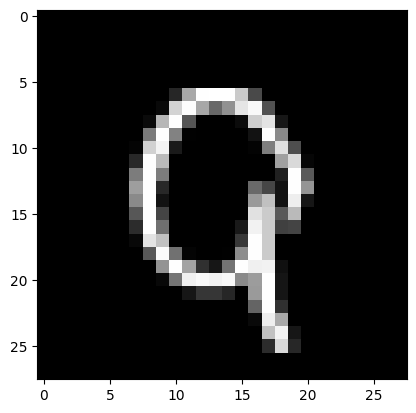

In [8]:
image_show(100, train_data, train_label)

The image label of index 20 is 0.


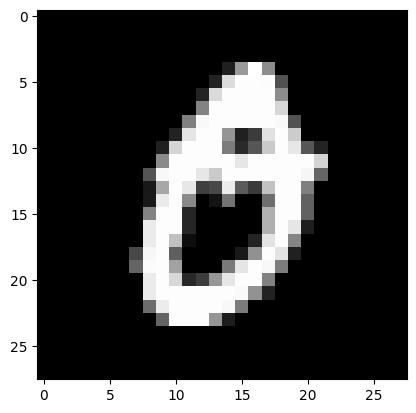

In [9]:
image_show(20, test_data, test_label)

In [10]:
# KNN Algos
# L2 square distance between two vectorized images x and y
def distance1(x,y):
    return np.sum(np.square(x-y))
# L2 distance between two vectorized images x and y
def distance2(x,y):
    return np.sqrt(np.sum(np.square(x-y)))
def distance3(x,y):
    return np.linalg.norm(x-y)

def kNN(x, k, data, label):
    data = np.asarray(data)
    label = np.asarray(label)
    x = np.asarray(x)
    distances =[distance1(x,data[i]) for i in range(len(data))]
    idx = np.argpartition(distances, k).astype(np.int64)
    clas, freq = np.unique(label[idx[:k]], return_counts=True)
    return clas[np.argmax(freq)]

In [11]:
i=523
print('The predicted value is : ', 
      kNN(test_data[i], 5, train_data, train_label), 
      ' and the true value is ', 
      test_label[i])

The predicted value is :  7  and the true value is  4


### Accuracy on the test set

In [12]:
def accuracy_set(data, label, train_data, train_label, k):
    cnt = 0
    for x, lab in zip(data,label):
        if kNN(x,k, train_data, train_label) == lab:
            cnt += 1
    return cnt/len(label)

In [ ]:
import time
time_start = time.time()
k_acc = [accuracy_set(test_data, test_label, train_data, train_label, k) for k in range(10,12)]
time_end = time.time()
print("Time cost:", time_end - time_start)
k_acc

In [1]:
X = [k for k in range(1,2)]
plt.figure(figsize = (10,5))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.plot(X,k_acc)
plt.savefig("k_acc.png")

NameError: name 'plt' is not defined